# Static Visualization

The following plots were generated using the NBA 1982-2022 Player Statistics with MVP votes dataset. I have chosen to first plot a scatter plot which shows the win-loss percentage for LeBron James, Kobe Bryant and Michael Jordan with their corresponding age. The second graph I chose to plot is a pie chart showing the MVP award votes split for the year 2016. 

Run the below cell to see the two graphs

/tmp/ipykernel_68061/3755656149.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['color'] = df_2016['player'].map(players_colors).copy()  # Map player names to their assigned colors


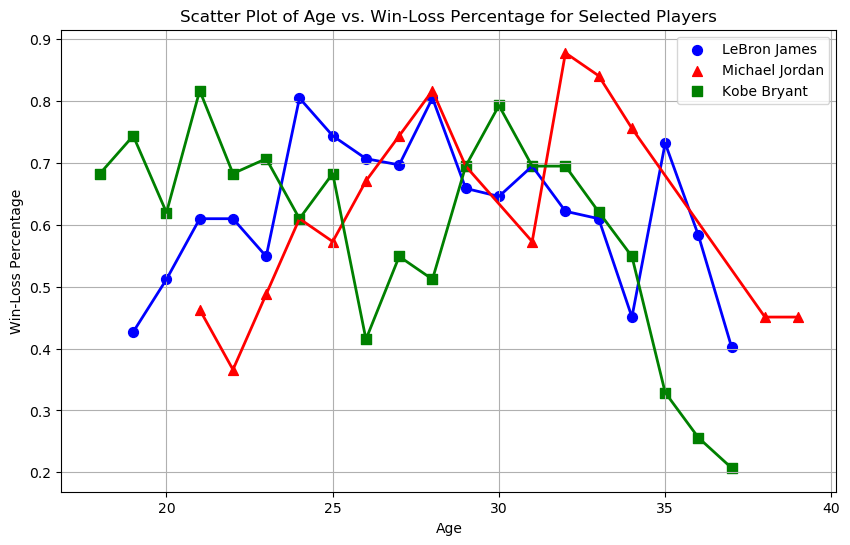

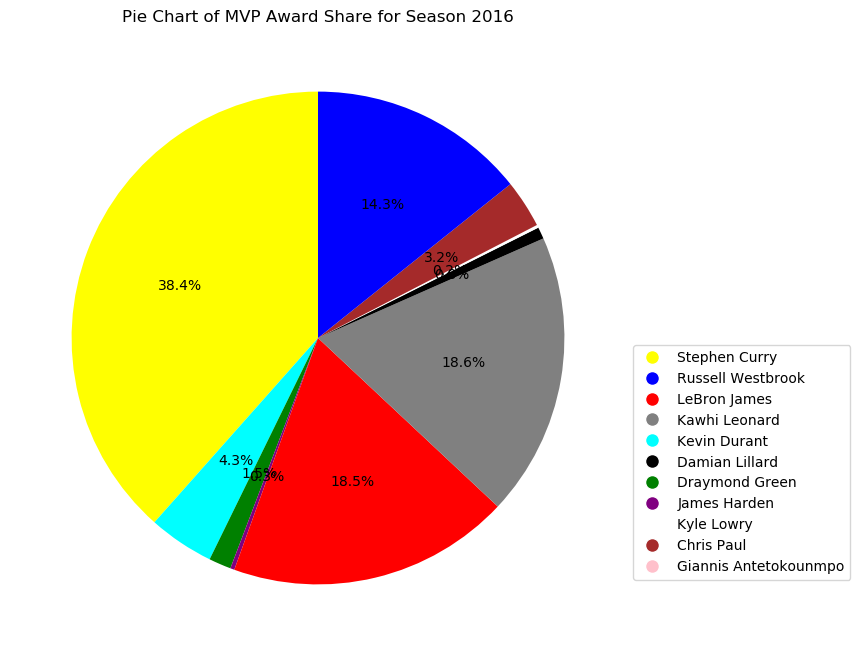

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Specify the relative path to the CSV file
file_path = os.path.join('NBA_Dataset.csv')

# Check if the file exists
if os.path.isfile(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Replace "Lebron James" with "LeBron James" in the 'player' column
    df['player'] = df['player'].replace('Lebron James', 'LeBron James')

    # Scatter Plot
    plt.figure(figsize=(10, 6))

    # Filter Data for LeBron James, Michael Jordan, and Kobe Bryant
    selected_players = ['LeBron James', 'Michael Jordan', 'Kobe Bryant']
    filtered_df = df[df['player'].isin(selected_players)]

    # Plot for LeBron James
    plt.scatter(
        filtered_df[filtered_df['player'] == 'LeBron James']['age'],
        filtered_df[filtered_df['player'] == 'LeBron James']['win_loss_pct'],
        label='LeBron James',  # Label for the data points
        color='blue',  # Color of the data points
        marker='o',  # Marker style (circle)
        s=50  # Marker size
    )
    plt.plot(
        filtered_df[filtered_df['player'] == 'LeBron James']['age'],
        filtered_df[filtered_df['player'] == 'LeBron James']['win_loss_pct'],
        color='blue',  # Color of the line
        linestyle='-',  # Line style (solid)
        linewidth=2  # Line width
    )

    # Plot for Michael Jordan
    plt.scatter(
        filtered_df[filtered_df['player'] == 'Michael Jordan']['age'],
        filtered_df[filtered_df['player'] == 'Michael Jordan']['win_loss_pct'],
        label='Michael Jordan',  # Label for the data points
        color='red',  # Color of the data points
        marker='^',  # Marker style (triangle)
        s=50  # Marker size
    )
    plt.plot(
        filtered_df[filtered_df['player'] == 'Michael Jordan']['age'],
        filtered_df[filtered_df['player'] == 'Michael Jordan']['win_loss_pct'],
        color='red',  # Color of the line
        linestyle='-',  # Line style (solid)
        linewidth=2  # Line width
    )

    # Plot for Kobe Bryant
    plt.scatter(
        filtered_df[filtered_df['player'] == 'Kobe Bryant']['age'],
        filtered_df[filtered_df['player'] == 'Kobe Bryant']['win_loss_pct'],
        label='Kobe Bryant',  # Label for the data points
        color='green',  # Color of the data points
        marker='s',  # Marker style (square)
        s=50  # Marker size
    )
    plt.plot(
        filtered_df[filtered_df['player'] == 'Kobe Bryant']['age'],
        filtered_df[filtered_df['player'] == 'Kobe Bryant']['win_loss_pct'],
        color='green',  # Color of the line
        linestyle='-',  # Line style (solid)
        linewidth=2  # Line width
    )

    # Customize Plot
    plt.title('Scatter Plot of Age vs. Win-Loss Percentage for Selected Players')  # Title of the plot
    plt.xlabel('Age')  # X-axis label
    plt.ylabel('Win-Loss Percentage')  # Y-axis label
    plt.legend()  # Show legend
    plt.grid(True)  # Display grid on the plot

    # Pie Chart for Award Share in 2016
    plt.figure(figsize=(8, 8))  # Set the figure size for the pie chart
    df_2016 = df[(df['season'] == 2016) & (df['award_share'] > 0)]  # Filter data for the year 2016 and positive award share

    # Assign specific colors to each player for the pie chart
    players_colors = {
        'Stephen Curry': 'yellow',
        'Russell Westbrook': 'blue',
        'LeBron James': 'red',
        'Kawhi Leonard': 'grey',
        'Kevin Durant': 'cyan',
        'Damian Lillard': 'black',
        'Draymond Green': 'green',
        'James Harden': 'purple',
        'Kyle Lowry': 'white',
        'Chris Paul': 'brown',
        'Giannis Antetokounmpo': 'pink'
    }

    df_2016['color'] = df_2016['player'].map(players_colors).copy()  # Map player names to their assigned colors

    # Exclude NaN values in the 'color' column
    df_2016 = df_2016.dropna(subset=['color'])

    # Create a pie chart
    plt.pie(df_2016['award_share'], labels=None, autopct='%1.1f%%', startangle=90, colors=df_2016['color'])
    plt.title('Pie Chart of MVP Award Share for Season 2016')  # Set the title of the pie chart

    # Add Legend for Pie Chart
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=players_colors[player], markersize=10)
                      for player in players_colors]
    plt.legend(handles=legend_handles, labels=players_colors.keys(), loc='best', bbox_to_anchor=(1, 0.5))  # Add legend

    # Show Plots
    plt.show()  # Display the pie chart
else:
    print(f"Error: File '{file_path}' not found.")  # Print an error message if the file is not found
